In [1]:
from DataGen import *
from Helper import *
from Config import Config
from Net import Network
from Plotting import *
from DataHandle import *
config = Config()


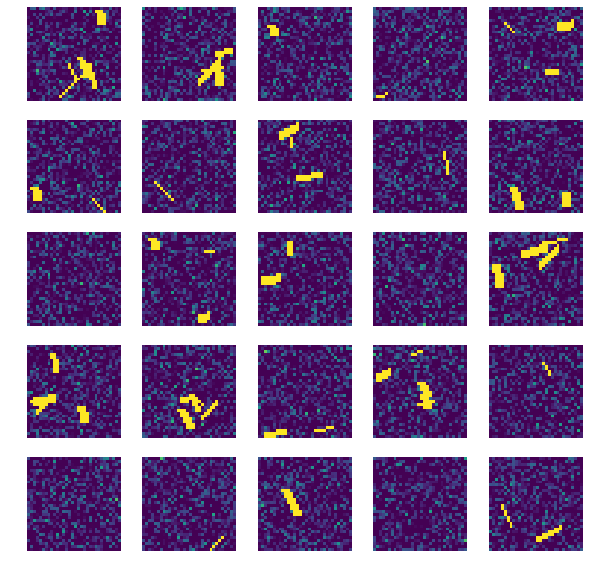

In [2]:
train_data, test_data, train_labels, test_labels = gen_TestTrain();
plot_25_ims()

In [ ]:
net = Network()

In [ ]:
#net.train(train_data, train_labels, 100)
#net.save()
net.load()

In [ ]:
c = gen_VideoTest() 
plt.imshow(c, vmax = 1, vmin = 0)

In [ ]:
"""
f = 440.0
data = np.load(str(f) + '.npy')
#plt.imshow(data, aspect='auto')
#plt.show()
data = np.clip(data,0,5)/5
x = 60518
c = data[0:320, x:x+32]
"""

In [ ]:
%matplotlib notebook
import time 

fig, ax = plt.subplots(1,1)
plt.ion()
fig.show()

buffer = ImgBuffer()
for n in range(np.shape(c)[0]-config.L):
    plt.cla()
    currIm = np.reshape(c[n:n+config.L,:], [1, config.L, config.L])
    pred = net.predict(currIm) 

    boxes = process_pred(pred)

    buffer.update_timer()
    buffer.process_new(boxes, n)
    buffer.process_existing(n)
    
    plt.cla()
    ax.imshow(c[n:n+config.L,:], vmax = 1, vmin = 0)
    plt.xticks(np.arange(config.f, config.L, config.f))
    plt.yticks(np.arange(config.f, config.L, config.f))
    plt.axis("on")
    plt.title(n)
    plt.grid(True, alpha = .3)
    for z in range(len(boxes)):
        cx, cy, w, h = boxes[z]
        ax.add_patch(patch.Circle((cy,cx), 0.5, ec = 'w', fc = 'w'))
        ax.add_patch(patch.Rectangle((cy-h/2, cx-w/2),\
            h, w, ec='w', fc='none'))  
    
    fig.canvas.draw() 
    


In [ ]:
%matplotlib inline
for i in buffer.final_array:
    cx, cy, w, h = (corners_to_box(i))
    print(cx,cy,w,h)
    minx, maxx = int(np.floor(cx - w/2)), int(np.ceil(cx + w/2))
    miny, maxy = int(np.floor(cy - h/2)), int(np.ceil(cy + h/2))
    thisimg = c[minx: maxx, miny:maxy]
    plt.imshow(thisimg, vmax = 1, vmin = 0)
    plt.xticks(np.arange(0,maxy-miny,4), np.arange(miny, maxy,4))
    plt.yticks(np.arange(0,maxx-minx,4), np.arange(minx, maxx,4))
    plt.show()



In [ ]:
%matplotlib qt 

plt.imshow(c, vmax = 1, vmin = 0)
plt.show()